## _*Quantum SVM algorithm:  multiclass classifier extension*_

A multiclass extension works in conjunction with an underlying binary (two class) classifier to provide multiclass classification.

Currently three different multiclass extensions are supported:

* OneAgainstRest
* AllPairs
* ErrorCorrectingCode

These use different techniques to group the data with binary classification to achieve the final multiclass classification.

In [1]:
import numpy as np
from qiskit.ml.datasets import wine
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils.dataset_helper import get_feature_dimension

Here we choose the `Wine` dataset which has 3 classes.

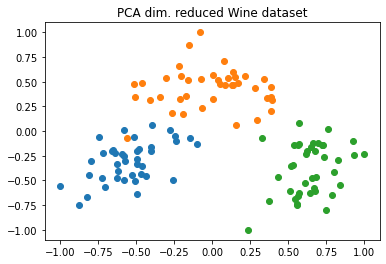

In [2]:
n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = wine(
    training_size=40,
    test_size=10, n=n, plot_data=True
)
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

Although the `AllPairs` extension is used here in the example the following multiclass extensions would also work:

    'OneAgainstRest'
    'ErrorCorrectingCode', 'code_size': 5

In [3]:
aqua_globals.random_seed = 10598

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input),
                           reps=2, entanglement='linear')
svm = QSVM(feature_map, training_input, test_input, total_array,
          multiclass_extension=AllPairs())
quantum_instance = QuantumInstance(backend, shots=1024,
                                    seed_simulator=aqua_globals.random_seed,
                                    seed_transpiler=aqua_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print("'{}' : {}".format(k, v))


'testing_accuracy' : 1.0
'test_success_ratio' : 1.0
'predicted_labels' : [0 0 1 1 1 2 2 2 2 2]
'predicted_classes' : ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
